In [7]:
from pathlib import Path
import wave
from scipy.io.wavfile import read
import numpy as np
import matplotlib.pyplot as plt

DATA_PATH = Path("../data/magpie. 35k, mono, 8-bit, 11025 Hz, 3.3 seconds.wav")

# with scipy
raw_scipy = read(DATA_PATH)

# with wave and numpy
# Read file to get buffer                                                                                               
ifile = wave.open(str(DATA_PATH)) # BUG with pathlib
samples = ifile.getnframes()
audio = ifile.readframes(samples)

# Convert buffer to float32 using NumPy                                                                                 
audio_as_np_uint8 = np.frombuffer(audio, dtype=np.uint8)
audio_as_np_float32 = audio_as_np_uint8.astype(np.float32)

# Normalise float32 array so that values are between 0 and +1.0                                                      
max_uint8 = 255
audio_normalised = audio_as_np_float32 / max_uint8


In [29]:
print(raw_scipy)

(11025, array([129, 126, 128, ..., 128, 127, 125], dtype=uint8))


In [56]:
print(audio_as_np_uint8)
print(audio_normalised)

[129 126 128 ... 128 127 125]
[0.5058824  0.49411765 0.5019608  ... 0.5019608  0.49803922 0.49019608]


Text(0, 0.5, 'amplitude')

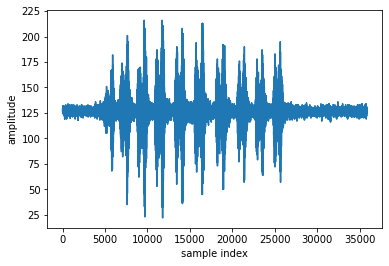

In [8]:
x = list(range(len(raw_scipy[1])))
y = raw_scipy[1]

fig, ax = plt.subplots()
plt.plot(x, y)
ax.set_xlabel("sample index")
ax.set_ylabel("amplitude")

Text(0, 0.5, 'amplitude, scaled by int16=32767')

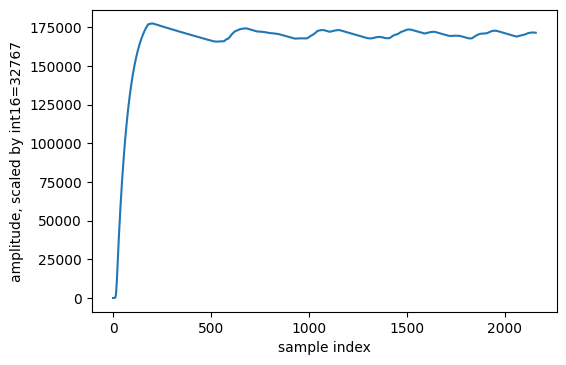

In [24]:
DATA_PATH = Path("../data/out.wav")

raw_scipy = read(DATA_PATH)

x = list(range(len(raw_scipy[1])))
y = raw_scipy[1]

fig, ax = plt.subplots()
#fig.set_size_inches((7, 5))
fig.set_dpi(100)
plt.plot(x, y)
ax.set_xlabel("sample index")
ax.set_ylabel("amplitude, scaled by int16=32767")